<h1>Competição DSA de Machine Learning</h1>

<h3>Edição de Janeiro/2019</h3>

O conjunto de dados é do Instituto Nacional de Diabetes e Doenças Digestivas e Renais (National Institute of Diabetes and Digestive and Kidney Diseases). O objetivo é prever com base em medidas de diagnóstico, se um paciente tem diabetes. Várias restrições foram colocadas na seleção dessas instâncias de um banco de dados maior. Em particular, todos os pacientes aqui são do sexo feminino com pelo menos 21 anos de idade.

<h3>Descrição dos Campos</h3>

<ul>
    <li>num_gestacoes - Número de vezes grávida</li>
    <li>glicose - Concentração plasmática de glicose em teste oral de tolerância à glicose</li>
    <li>pressao_sanguinea - Pressão arterial diastólica em mm Hg</li>
    <li>grossura_pele - Espessura da dobra da pele do tríceps em mm</li>
    <li>insulina - Insulina em mu U / ml</li>
    <li>bmi - Índice de massa corporal medido em peso em kg / (altura em m) ^ 2</li>
    <li>indice_historico - Índice de histórico de diabetes (Pedigree Function)</li>
    <li>idade - Idade em anos</li>
    <li>classe - Classe (0 - não desenvolveu a doença / 1 - desenvolveu a doença)</li>
</ul>

<h5>Bibliotecas Necessarias</h5>

In [1]:
### Imports

## Ignorando warnings
import warnings
warnings.filterwarnings('ignore')

## Blibliotecas Basicas
import operator
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from collections import Counter
from matplotlib import pyplot as plt

## Bibliotecas de Processamento e Analise
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score, train_test_split

## Bibliotecas de Machine Learning - 14 Alg
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import ExtraTreesClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier


<h5>Carregando os datasets</h5>

In [2]:
arquivo_treino = './dataset_treino.csv'
arquivo_teste = './dataset_teste.csv'

df_treino = pd.read_csv(arquivo_treino)
df_teste = pd.read_csv(arquivo_teste)

<h5>Variaveis Defaul</h5>

In [3]:
Y = df_treino['classe']
X = df_treino.drop(['classe'], axis= 1)

colunas = X.columns

<h3>Análise Exploratória de Dados</h3>

In [4]:
df_treino.head(10)

,id,num_gestacoes,glicose,pressao_sanguinea,grossura_pele,insulina,bmi,indice_historico,idade,classe
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1
5,6,5,116,74,0,0,25.6,0.201,30,0
6,7,3,78,50,32,88,31.0,0.248,26,1
7,8,10,115,0,0,0,35.3,0.134,29,0
8,9,2,197,70,45,543,30.5,0.158,53,1
9,10,8,125,96,0,0,0.0,0.232,54,1


<h5>Dimensões do dataset</h5>

In [5]:
print("O Conjunto de dados de treino possui as dimensões: %d Linhas x %d Colunas" % (df_treino.shape))
print("O Conjunto de dados de teste possui as dimensões: %d Linhas x %d Colunas" % (df_teste.shape))

O Conjunto de dados de treino possui as dimensões: 600 Linhas x 10 Colunas
O Conjunto de dados de teste possui as dimensões: 168 Linhas x 9 Colunas


<h5>Verificando os tipos de dados</h5>

In [6]:
df_treino.dtypes

id                     int64
num_gestacoes          int64
glicose                int64
pressao_sanguinea      int64
grossura_pele          int64
insulina               int64
bmi                  float64
indice_historico     float64
idade                  int64
classe                 int64
dtype: object

<h5>Sumário com informações estatísticas.</h5>

In [7]:
df_treino.describe()

,id,num_gestacoes,glicose,pressao_sanguinea,grossura_pele,insulina,bmi,indice_historico,idade,classe
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,300.500000,3.820000,120.135000,68.681667,20.558333,79.528333,31.905333,0.481063,33.278333,0.346667
std,173.349358,3.362009,32.658246,19.360226,16.004588,116.490583,8.009638,0.337284,11.822315,0.476306
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,150.750000,1.000000,99.000000,64.000000,0.000000,0.000000,27.075000,0.248000,24.000000,0.000000
50%,300.500000,3.000000,116.000000,70.000000,23.000000,36.500000,32.000000,0.384000,29.000000,0.000000
75%,450.250000,6.000000,140.000000,80.000000,32.000000,122.750000,36.525000,0.647000,40.000000,1.000000
max,600.000000,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<h5>Verificando a distribuição dos dados.</h5>

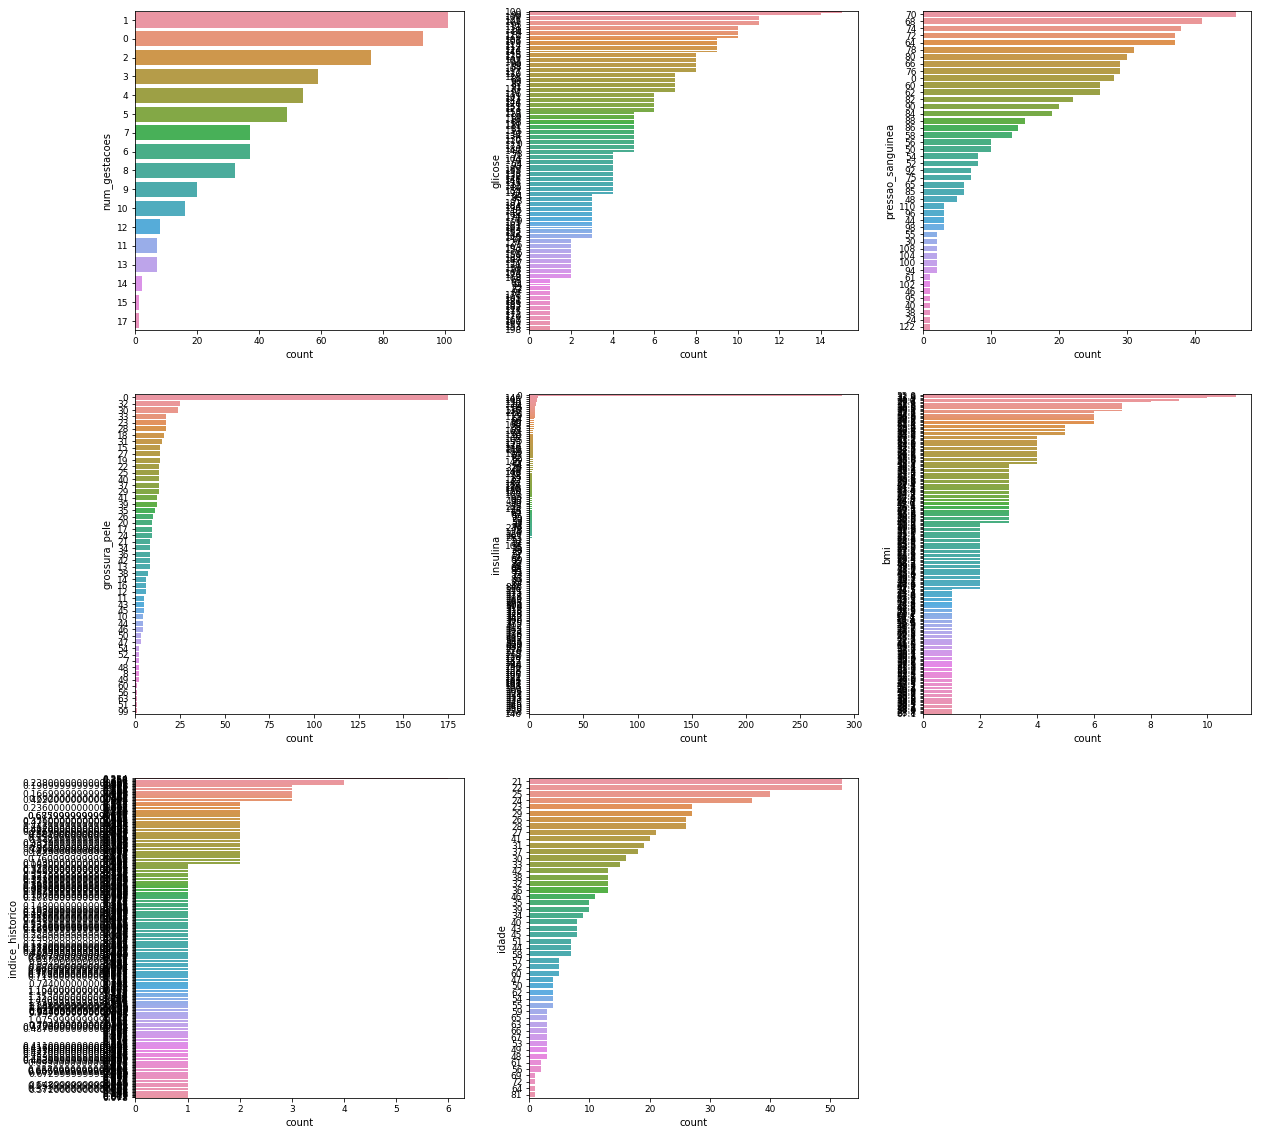

In [8]:
fig = plt.figure(figsize=(20,20))
fig.subplots_adjust(hspace=0.2, wspace=0.2)
for i in range(1, len(colunas)):  
    n = df_treino.groupby(colunas[i])[colunas[i]].count().sort_values(ascending=False)
    
    ax = fig.add_subplot(3, 3, i)
    descending_order = n.index
    ax = fig.add_subplot(sns.countplot(y=df_treino[colunas[i]],order=descending_order))

    plt.yticks(fontsize=9)
    plt.xticks(fontsize=9)
    ax.plot()

<h5>Analise da correlação</h5>

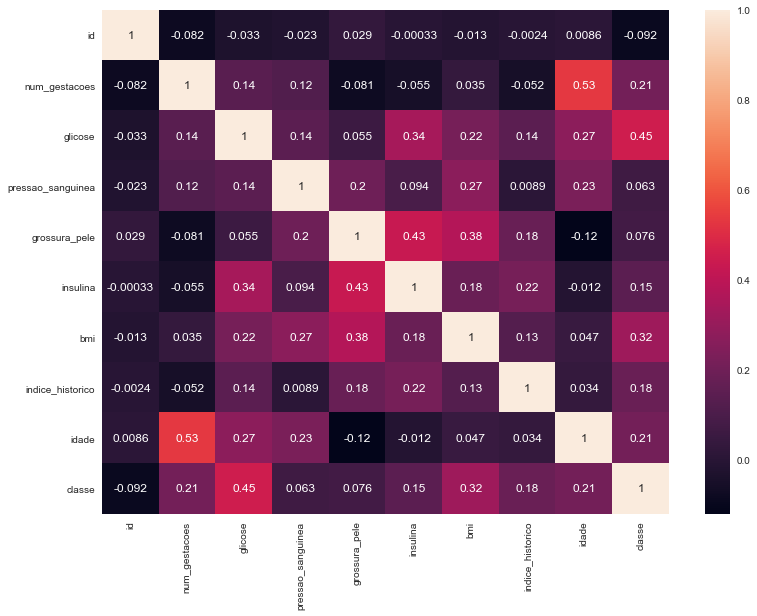

In [9]:
sns.set(rc={'figure.figsize':(12.7,9.27)})
sns.heatmap(df_treino.corr(), annot=True)

<h5>Analise do Histograma dos dados</h5>

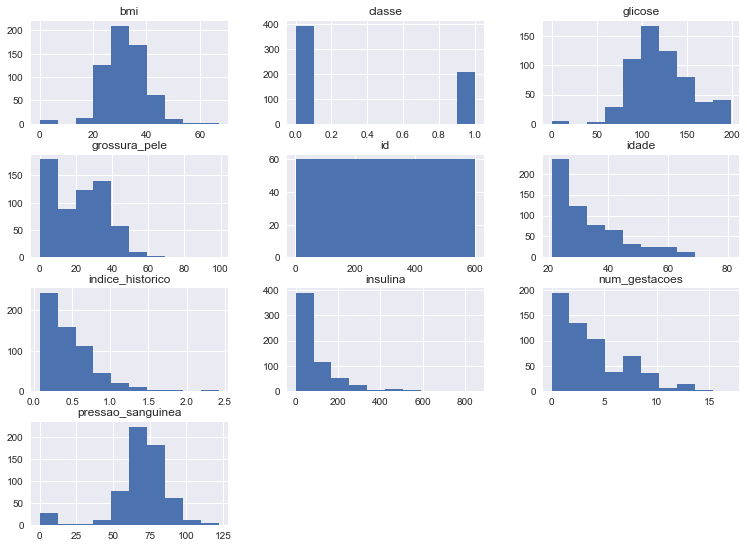

In [10]:
df_treino.hist()
plt.show()

<h5>Analise da densidade dos dados</h5>

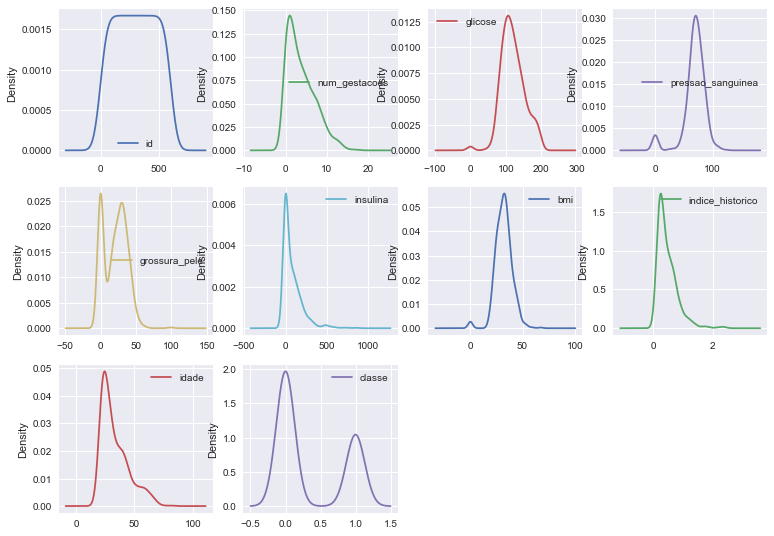

In [11]:
df_treino.plot(kind='density', subplots=True, layout=(3,4), sharex= False)
plt.show()

<h5>Verificando a dispersão dos dados com boxplot</h5>

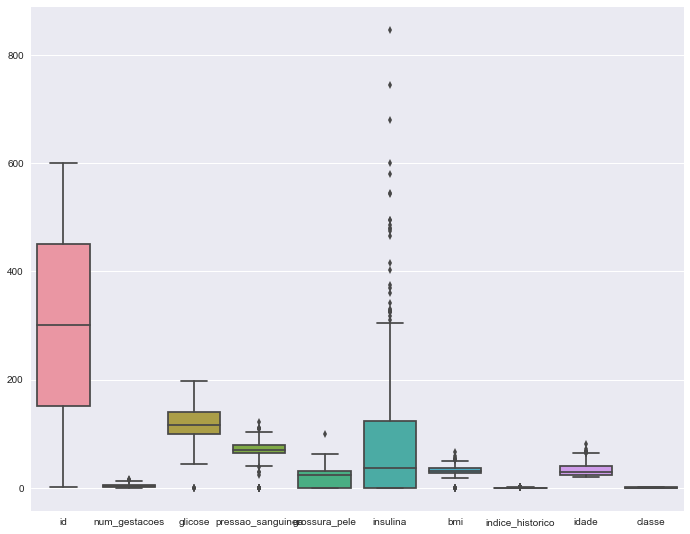

In [12]:
sns.set(rc={'figure.figsize':(11.7,9.27)})
sns.boxplot(data=df_treino, orient='v')

<h3>Preparação dos Dados (Data Wrangling)</h3>

<h5>Processo de normalização com a técnica - MinMaxScaler</h5>

In [13]:
def normalizar_MinMaxScaler(X):
    colunas_normalizadas = list(X.columns)
    x_scaler = MinMaxScaler().fit_transform(X)
    X_norm_mms = pd.DataFrame(x_scaler, columns = colunas_normalizadas)
    return X_norm_mms

<h5>Processo de normalização com a técnica - StandardScaler</h5>

In [14]:
def normalizar_StandardScaler(X):
    colunas_normalizadas = list(X.columns)
    x_scaler = StandardScaler().fit_transform(X)
    X_norm_ss = pd.DataFrame(x_scaler, columns = colunas_normalizadas)
    return X_norm_ss

<h5>Feature Selection</h5>

In [15]:
def FeatureSelection(X,Y):
    modelo = ExtraTreesClassifier()
    modelo.fit(X,Y)
    
    pontuacao = list(modelo.feature_importances_)  
    
    index = np.arange(len(colunas))
    plt.barh(index, pontuacao)
    plt.xlabel('Feature', fontsize=11)
    plt.ylabel('Pontuacao', fontsize=11)
    plt.yticks(index, colunas, fontsize=10, rotation=30)
    plt.title('Pontuacao das variaveis para possiveis variaveis features.')
    plt.show()
    
    print("As Melhores Features São:\n")
    melhores_colunas = []
    for i,j in zip(list(colunas), pontuacao):
        if(j > 0.1):
            print(" Coluna: %s: %s " % (i,j))
            melhores_colunas.append(i)
     
    print("\nO Modelo com as melhores Features Ficou:\n")
    print(X[melhores_colunas].head(5))
    return(X[melhores_colunas])

<h5>Busca e Remoção de Outliers - Técnica IQR (Percentil)</h5>

In [16]:
def busca_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    return IQR
        
def remover_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = busca_outliers_iqr(df)
    qtd_shape_original = df.shape[0]
    df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
    print("Dataset original: %s" % qtd_shape_original)
    print("Dataset sem outliers: %s" % df.shape[0])
    print("Quantidade de outliers removidos: %s" % (qtd_shape_original - df.shape[0]))
    sns.set(rc={'figure.figsize':(11.7,9.27)})
    sns.boxplot(data=df, orient='v')
    return df

<h5>Busca e Remoção de Outliers - Técnica Z-Score</h5>

In [17]:
def busca_outliers_zscore(df):
    z = np.abs(stats.zscore(df))
    return z

def remover_outliers_zscore(df):
    z = busca_outliers_zscore(df)
    qtd_shape_original = df.shape[0]
    df = df[(z < 3).all(axis=1)]
    print("Dataset original: %s" % qtd_shape_original)
    print("Dataset sem outliers: %s" % df.shape[0])
    print("Quantidade de outliers removidos: %s" % (qtd_shape_original - df.shape[0]))
    sns.set(rc={'figure.figsize':(11.7,9.27)})
    sns.boxplot(data=df, orient='v')
    return df

<h3>Criação de um metodo para ranking de algoritmo.</h3>

In [18]:
def ranking(X,Y):
    modelos = []
    modelos.append(('SVM', SVC()))
    modelos.append(('XGB', XGBClassifier()))
    modelos.append(('NB', GaussianNB()))   
    modelos.append(('CART', DecisionTreeClassifier()))
    modelos.append(('MLP', MLPClassifier()))
    modelos.append(('KNN', KNeighborsClassifier()))      
    modelos.append(('LR', LogisticRegression()))
    modelos.append(('SGD', SGDClassifier()))    
    modelos.append(('LDA', LinearDiscriminantAnalysis()))   
    modelos.append(('ETC', ExtraTreesClassifier()))
    modelos.append(('BGC', BaggingClassifier()))
    modelos.append(('GBC', GradientBoostingClassifier()))   
    modelos.append(('RFC', RandomForestClassifier()))
    modelos.append(('ADA', AdaBoostClassifier()))
     
    resultados = []
    nomes = []
    _sup = 0
    msg = ""
    for nome, modelo in modelos:        
        cv_results = cross_val_score(modelo, X, Y, cv=5, scoring='accuracy')
        resultados.append(cv_results)
        nomes.append(nome)
        _sup += 1
        msg += "%s: %f (%f)  -  " % (nome, cv_results.mean(), cv_results.std())
        if(_sup == 4):            
            print(msg)
            msg = ""
            _sup = 0
        
    _max = []
    for i,j in zip(resultados, nomes):
        _max.append((i.mean(), j))        
    print("\n\tA melhor pontuação foi de: %f para o algoritmo %s " % max(_max))
             
    sns.set(rc={'figure.figsize':(9.7,7.27)})
    fig = sns.boxplot(data=resultados, whis=np.inf, width=.35)
    plt.title("Comparacao de Algoritmos")
    y_pos = np.arange(len(nomes))
    plt.xticks(y_pos, nomes)
    plt.show(fig) 
    return(max(_max))

<h3>Preparacao do dataset com diferentes perspectivas.</h3>

<h5>Todas Colunas com Normalizacao MinMaxScaler</h5>

In [19]:
X_norm_mms = normalizar_MinMaxScaler(X)
X_norm_mms.head(3)

,id,num_gestacoes,glicose,pressao_sanguinea,grossura_pele,insulina,bmi,indice_historico,idade
0,0.000000,0.352941,0.747475,0.590164,0.353535,0.0,0.500745,0.234415,0.483333
1,0.001669,0.058824,0.429293,0.540984,0.292929,0.0,0.396423,0.116567,0.166667
2,0.003339,0.470588,0.924242,0.524590,0.000000,0.0,0.347243,0.253629,0.183333


<h5>Todas Colunas Com Normalizacao StandardScaler</h5>

In [20]:
X_norm_ss = normalizar_StandardScaler(X)
X_norm_ss.head(3)

,id,num_gestacoes,glicose,pressao_sanguinea,grossura_pele,insulina,bmi,indice_historico,idade
0,-1.729166,0.648963,0.853942,0.171543,0.903098,-0.683271,0.211755,0.433043,1.415596
1,-1.723393,-0.839484,-1.076736,-0.138630,0.527893,-0.683271,-0.662921,-0.385941,-0.192875
2,-1.717619,1.244342,1.926541,-0.242021,-1.285599,-0.683271,-1.075269,0.566573,-0.108219


<h5>Somente as principais colunas com Feature Selection, sem normalizacao</h5>

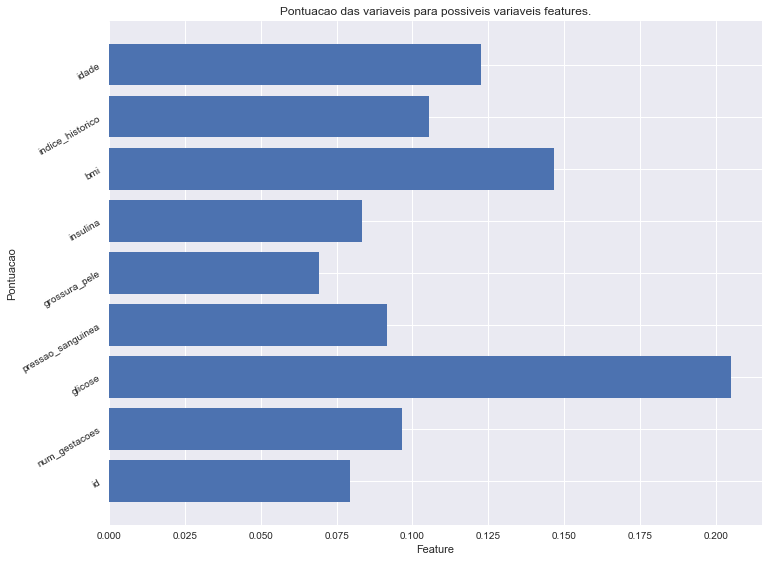

As Melhores Features São:

 Coluna: glicose: 0.20495235175813598 
 Coluna: bmi: 0.14681790471735645 
 Coluna: indice_historico: 0.10546022753385091 
 Coluna: idade: 0.12265189334358681 

O Modelo com as melhores Features Ficou:

   glicose   bmi  indice_historico  idade
0      148  33.6             0.627     50
1       85  26.6             0.351     31
2      183  23.3             0.672     32
3       89  28.1             0.167     21
4      137  43.1             2.288     33


In [21]:
X_fs = FeatureSelection(X,Y)

<h5>Somente as principais colunas com Feature Selection, com normalizacao MinMaxScaler</h5>

In [22]:
X_norm_mms_fs = normalizar_MinMaxScaler(X_fs)
X_norm_mms_fs.head(3)

,glicose,bmi,indice_historico,idade
0,0.747475,0.500745,0.234415,0.483333
1,0.429293,0.396423,0.116567,0.166667
2,0.924242,0.347243,0.253629,0.183333


<h5>Somente as principais colunas com Feature Selection, com normalizacao StandardScaler</h5>

In [23]:
X_norm_ss_fs = normalizar_StandardScaler(X_fs)
X_norm_ss_fs.head(3)

,glicose,bmi,indice_historico,idade
0,0.853942,0.211755,0.433043,1.415596
1,-1.076736,-0.662921,-0.385941,-0.192875
2,1.926541,-1.075269,0.566573,-0.108219


<h5>Remocao dos Outliers com a tecninca IQR, com dataset sem normalizacao</h5>

Dataset original: 600
Dataset sem outliers: 493
Quantidade de outliers removidos: 107
(493, 10)


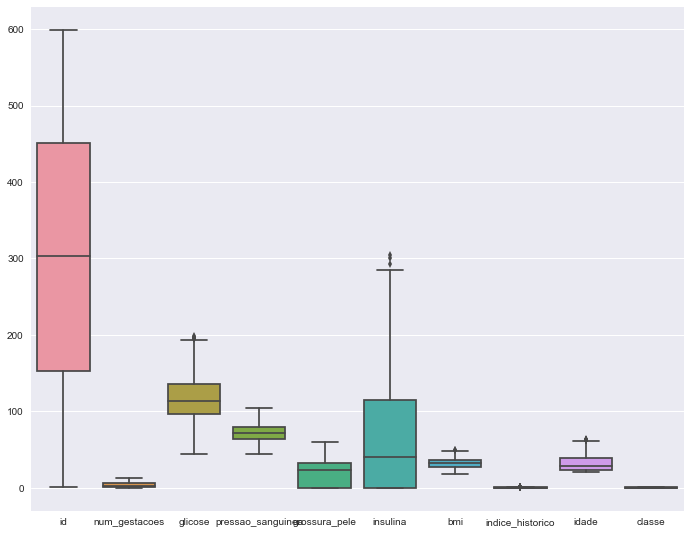

In [24]:
df_iqr = remover_outliers_iqr(df_treino)
print(df_iqr.shape)

X_iqr = df_iqr.drop('classe', axis=1)
Y_iqr = df_iqr.classe

<h5>Remocao dos Outliers com a tecninca Z-Score, com dataset sem normalizacao</h5>

Dataset original: 600
Dataset sem outliers: 536
Quantidade de outliers removidos: 64
(536, 10)


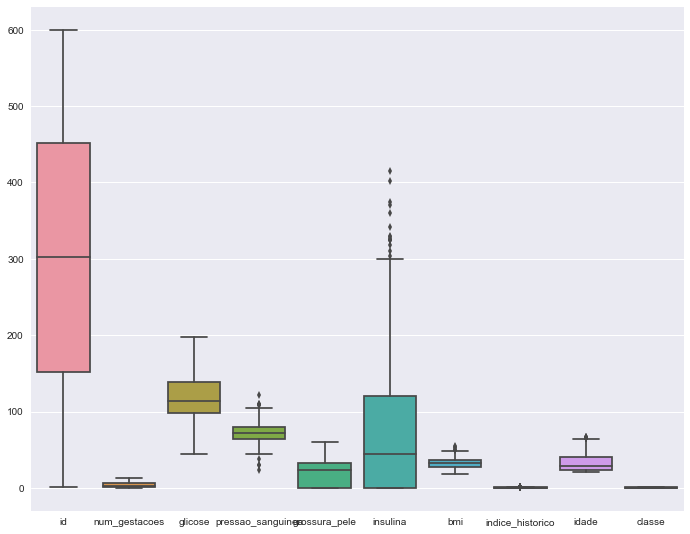

In [25]:
df_zscore = remover_outliers_zscore(df_treino)
print(df_zscore.shape)

X_zscore = df_zscore.drop('classe', axis=1)
Y_zscore = df_zscore.classe

<h5>Remocao dos Outliers com a tecninca IQR e normalizacao MinMaxScaler</h5>

In [26]:
X_iqr_norm_mms = normalizar_MinMaxScaler(X_iqr)
print(X_iqr_norm_mms.shape)
X_iqr_norm_mms.head(3)

(493, 9)


,id,num_gestacoes,glicose,pressao_sanguinea,grossura_pele,insulina,bmi,indice_historico,idade
0,0.000000,0.461538,0.675325,0.466667,0.583333,0.0,0.484277,0.479058,0.674419
1,0.001672,0.076923,0.266234,0.366667,0.483333,0.0,0.264151,0.238220,0.232558
2,0.003344,0.615385,0.902597,0.333333,0.000000,0.0,0.160377,0.518325,0.255814


<h5>Remocao dos Outliers com a tecninca Z-Score e normalizacao MinMaxScaler</h5>

In [27]:
X_zscore_norm_mms = normalizar_MinMaxScaler(X_zscore)
print(X_zscore_norm_mms.shape)
X_zscore_norm_mms.head(3)

(536, 9)


,id,num_gestacoes,glicose,pressao_sanguinea,grossura_pele,insulina,bmi,indice_historico,idade
0,0.000000,0.461538,0.675325,0.489796,0.583333,0.0,0.418478,0.392704,0.630435
1,0.001669,0.076923,0.266234,0.428571,0.483333,0.0,0.228261,0.195279,0.217391
2,0.003339,0.615385,0.902597,0.408163,0.000000,0.0,0.138587,0.424893,0.239130


<h5>Remocao dos Outliers com a tecninca IQR e normalizacao StandardScaler</h5>

In [28]:
X_iqr_norm_ss = normalizar_StandardScaler(X_iqr)
print(X_iqr_norm_ss.shape)
X_iqr_norm_ss.head(3)

(493, 9)


,id,num_gestacoes,glicose,pressao_sanguinea,grossura_pele,insulina,bmi,indice_historico,idade
0,-1.746176,0.682448,0.995135,0.005169,0.944734,-0.825325,0.248768,0.716599,1.640661
1,-1.740376,-0.867998,-1.122280,-0.540875,0.550806,-0.825325,-0.833283,-0.349683,-0.137228
2,-1.734577,1.302627,2.171477,-0.722889,-1.353177,-0.825325,-1.343393,0.890450,-0.043655


<h5>Remocao dos Outliers com a tecninca Z-Score e normalizacao StandardScaler</h5>

In [29]:
X_zscore_norm_ss = normalizar_StandardScaler(X_zscore)
print(X_zscore_norm_ss.shape)
X_zscore_norm_ss.head(3)

(536, 9)


,id,num_gestacoes,glicose,pressao_sanguinea,grossura_pele,insulina,bmi,indice_historico,idade
0,-1.744889,0.677725,0.943863,-0.005197,0.934674,-0.802002,0.225766,0.587684,1.462352
1,-1.739094,-0.872022,-1.145854,-0.496811,0.542922,-0.802002,-0.817558,-0.383958,-0.188345
2,-1.733300,1.297624,2.104817,-0.660682,-1.350546,-0.802002,-1.309410,0.746104,-0.101467


<h5>Remocao dos Outliers com a tecninca IQR, Feature Selection e normalizacao MinMaxScaler</h5>

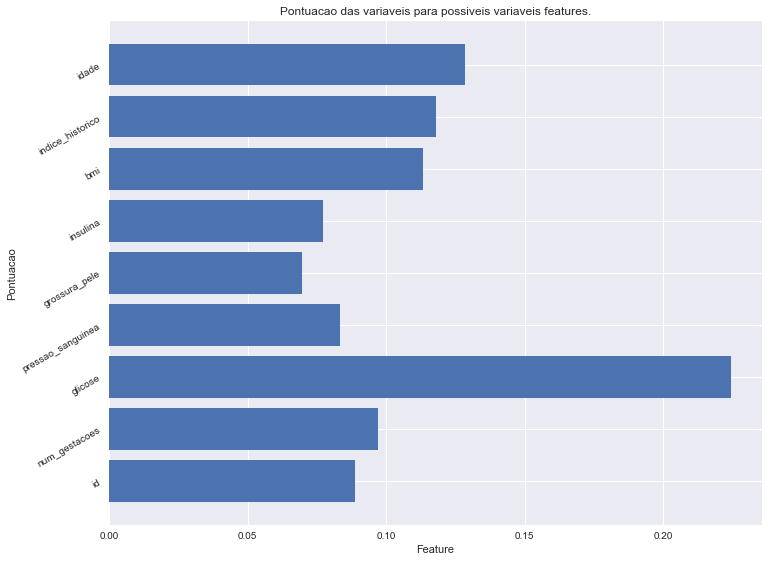

As Melhores Features São:

 Coluna: glicose: 0.22434521810575686 
 Coluna: bmi: 0.11328713339455294 
 Coluna: indice_historico: 0.11807654435224473 
 Coluna: idade: 0.12844903651553066 

O Modelo com as melhores Features Ficou:

   glicose   bmi  indice_historico  idade
0      148  33.6             0.627     50
1       85  26.6             0.351     31
2      183  23.3             0.672     32
3       89  28.1             0.167     21
5      116  25.6             0.201     30


,glicose,bmi,indice_historico,idade
0,0.675325,0.484277,0.479058,0.674419
1,0.266234,0.264151,0.238220,0.232558
2,0.902597,0.160377,0.518325,0.255814


In [30]:
X_iqr_fs = FeatureSelection(X_iqr, Y_iqr)
X_iqr_fs_norm_mms = normalizar_MinMaxScaler(X_iqr_fs)
X_iqr_fs_norm_mms.head(3)

<h5>Remocao dos Outliers com a tecninca Z-Score, Feature Selection e normalizacao MinMaxScaler</h5>

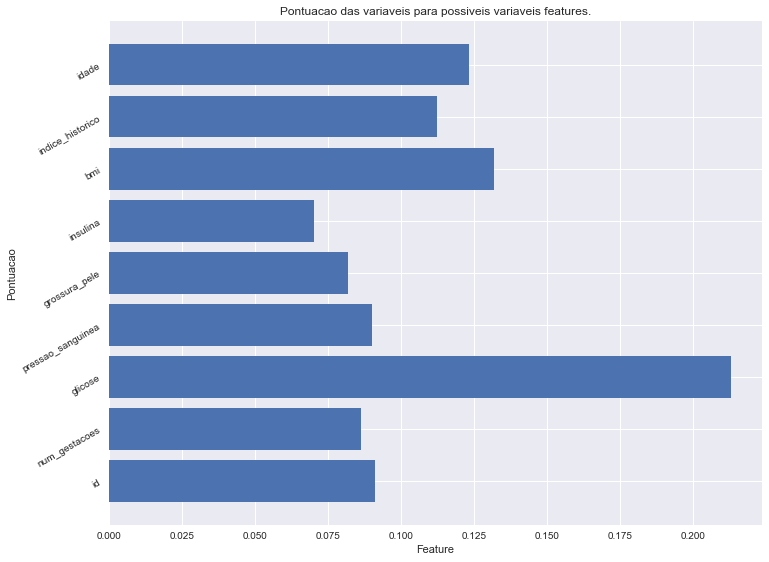

As Melhores Features São:

 Coluna: glicose: 0.2129979167308973 
 Coluna: bmi: 0.13174889344514512 
 Coluna: indice_historico: 0.11223971734119711 
 Coluna: idade: 0.12332675824433428 

O Modelo com as melhores Features Ficou:

   glicose   bmi  indice_historico  idade
0      148  33.6             0.627     50
1       85  26.6             0.351     31
2      183  23.3             0.672     32
3       89  28.1             0.167     21
5      116  25.6             0.201     30


,glicose,bmi,indice_historico,idade
0,0.675325,0.418478,0.392704,0.630435
1,0.266234,0.228261,0.195279,0.217391
2,0.902597,0.138587,0.424893,0.239130


In [31]:
X_zscore_fs = FeatureSelection(X_zscore, Y_zscore)
X_zscore_fs_norm_mms = normalizar_MinMaxScaler(X_zscore_fs)
X_zscore_fs_norm_mms.head(3)

<h5>Remocao dos Outliers com a tecninca IQR, Feature Selection e normalizacao StandardScaler</h5>

In [32]:
X_iqr_fs_norm_ss = normalizar_StandardScaler(X_iqr_fs)
X_iqr_fs_norm_ss.head(3)

,glicose,bmi,indice_historico,idade
0,0.995135,0.248768,0.716599,1.640661
1,-1.122280,-0.833283,-0.349683,-0.137228
2,2.171477,-1.343393,0.890450,-0.043655


<h5>Remocao dos Outliers com a tecninca Z-Score, Feature Selection e normalizacao StandardScaler</h5>

In [33]:
X_zscore_fs_norm_ss = normalizar_StandardScaler(X_zscore_fs)
X_zscore_fs_norm_ss.head(3)

,glicose,bmi,indice_historico,idade
0,0.943863,0.225766,0.587684,1.462352
1,-1.145854,-0.817558,-0.383958,-0.188345
2,2.104817,-1.309410,0.746104,-0.101467


<h3>Datasets</h3>

In [34]:
datasets = []

datasets.append((X, Y, "Padrao"))
datasets.append((X_norm_mms, Y, "MinMaxScaler"))
datasets.append((X_norm_ss, Y, "StandardScaler"))
datasets.append((X_fs, Y, "FeatureSelection"))
datasets.append((X_norm_mms_fs, Y, "MinMaxScaler_e_FeatureSelection"))
datasets.append((X_norm_ss_fs, Y, "StandardScaler_e_FeatureSelection"))
datasets.append((X_zscore, Y_zscore, "Z-Score"))
datasets.append((X_iqr, Y_iqr, "IQR"))
datasets.append((X_zscore_norm_mms, Y_zscore, "MinMaxScaler_e_Z-Score"))
datasets.append((X_zscore_norm_ss, Y_zscore, "StandardScaler_e_Z-Score"))
datasets.append((X_iqr_norm_mms, Y_iqr, "MinMaxScaler_e_IQR"))
datasets.append((X_iqr_norm_ss, Y_iqr, "StandardScaler_e_IQR"))
datasets.append((X_zscore_fs, Y_zscore, "FeatureSelection_e_Z-Score"))
datasets.append((X_iqr_fs, Y_iqr, "FeatureSelection_e_IQR"))
datasets.append((X_iqr_fs_norm_mms, Y_iqr, "MinMaxScaler_FeatureSelection_e_IQR"))
datasets.append((X_iqr_fs_norm_ss,Y_iqr, "StandardScaler_FeatureSelection_e_IQR"))
datasets.append((X_zscore_fs_norm_mms, Y_zscore, "MinMaxScaler_FeatureSelection_e_Z-Score"))
datasets.append((X_zscore_fs_norm_ss, Y_zscore, "StandardScaler_FeatureSelection_e_Z-Score"))

def print_shape(datasets):
    for (X, Y, descricao) in datasets:
        print("O Dataset [%s] contem o shape: \n\t%d Colunas e %d Linhas, Tamanho de X: %d\n" 
              % (descricao, len(X.columns), len(Y), len(X)))
        
print_shape(datasets)

O Dataset [Padrao] contem o shape: 
	9 Colunas e 600 Linhas, Tamanho de X: 600

O Dataset [MinMaxScaler] contem o shape: 
	9 Colunas e 600 Linhas, Tamanho de X: 600

O Dataset [StandardScaler] contem o shape: 
	9 Colunas e 600 Linhas, Tamanho de X: 600

O Dataset [FeatureSelection] contem o shape: 
	4 Colunas e 600 Linhas, Tamanho de X: 600

O Dataset [MinMaxScaler_e_FeatureSelection] contem o shape: 
	4 Colunas e 600 Linhas, Tamanho de X: 600

O Dataset [StandardScaler_e_FeatureSelection] contem o shape: 
	4 Colunas e 600 Linhas, Tamanho de X: 600

O Dataset [Z-Score] contem o shape: 
	9 Colunas e 536 Linhas, Tamanho de X: 536

O Dataset [IQR] contem o shape: 
	9 Colunas e 493 Linhas, Tamanho de X: 493

O Dataset [MinMaxScaler_e_Z-Score] contem o shape: 
	9 Colunas e 536 Linhas, Tamanho de X: 536

O Dataset [StandardScaler_e_Z-Score] contem o shape: 
	9 Colunas e 536 Linhas, Tamanho de X: 536

O Dataset [MinMaxScaler_e_IQR] contem o shape: 
	9 Colunas e 493 Linhas, Tamanho de X: 493



<h3>Melhor algoritmo para cada dataset e pontuacao</h3>

SVM: 0.653342 (0.002028)  -  XGB: 0.679913 (0.033387)  -  NB: 0.755126 (0.030797)  -  CART: 0.630660 (0.135615)  -  
MLP: 0.592201 (0.089640)  -  KNN: 0.573477 (0.073806)  -  LR: 0.746736 (0.023836)  -  SGD: 0.610449 (0.112397)  -  
LDA: 0.763390 (0.015466)  -  ETC: 0.711582 (0.030327)  -  BGC: 0.670468 (0.095782)  -  GBC: 0.653369 (0.027399)  -  

	A melhor pontuação foi de: 0.763390 para o algoritmo LDA 


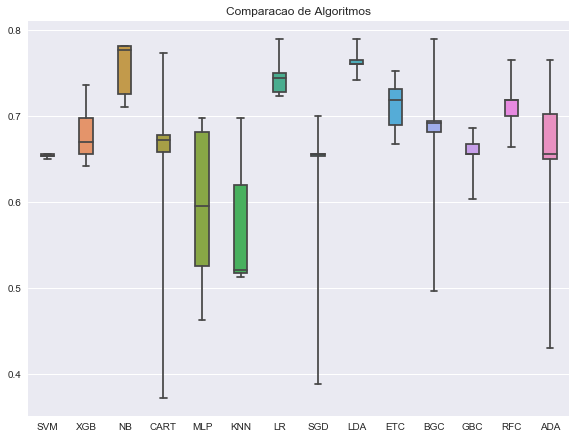

SVM: 0.734944 (0.019898)  -  XGB: 0.681566 (0.033029)  -  NB: 0.755126 (0.030797)  -  CART: 0.633966 (0.127676)  -  
MLP: 0.748500 (0.030963)  -  KNN: 0.705220 (0.038034)  -  LR: 0.745014 (0.024930)  -  SGD: 0.691484 (0.037515)  -  
LDA: 0.763390 (0.015466)  -  ETC: 0.691803 (0.039191)  -  BGC: 0.688288 (0.031418)  -  GBC: 0.656661 (0.028769)  -  

	A melhor pontuação foi de: 0.763390 para o algoritmo LDA 


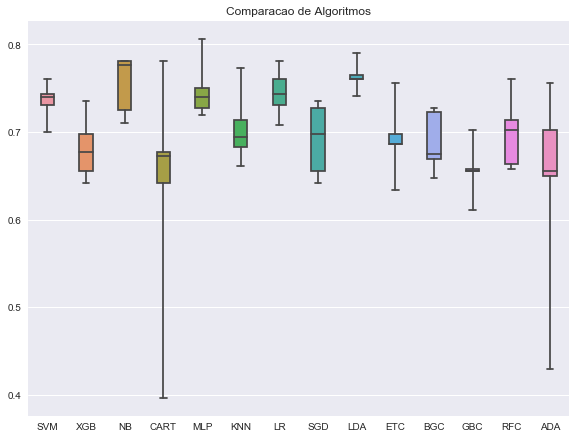

SVM: 0.746737 (0.028591)  -  XGB: 0.679913 (0.033387)  -  NB: 0.755126 (0.030797)  -  CART: 0.637285 (0.133981)  -  
MLP: 0.745167 (0.029156)  -  KNN: 0.725235 (0.038929)  -  LR: 0.765098 (0.015506)  -  SGD: 0.681774 (0.021017)  -  
LDA: 0.763390 (0.015466)  -  ETC: 0.693344 (0.027080)  -  BGC: 0.698400 (0.021076)  -  GBC: 0.658300 (0.017030)  -  

	A melhor pontuação foi de: 0.765098 para o algoritmo LR 


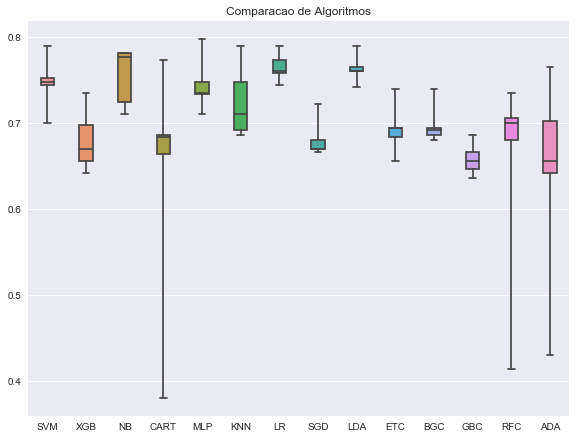

SVM: 0.640036 (0.007896)  -  XGB: 0.755098 (0.037658)  -  NB: 0.768446 (0.025552)  -  CART: 0.714998 (0.025605)  -  
MLP: 0.683274 (0.016020)  -  KNN: 0.721666 (0.042141)  -  LR: 0.773391 (0.022576)  -  SGD: 0.539958 (0.156041)  -  
LDA: 0.766724 (0.027327)  -  ETC: 0.733319 (0.027953)  -  BGC: 0.733347 (0.026158)  -  GBC: 0.753473 (0.037380)  -  

	A melhor pontuação foi de: 0.773391 para o algoritmo LR 


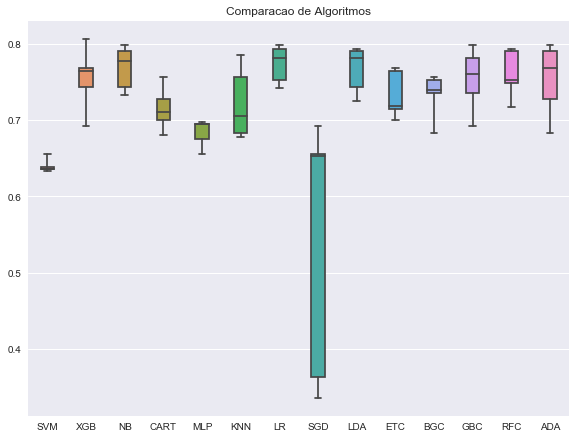

SVM: 0.763376 (0.029332)  -  XGB: 0.755098 (0.037658)  -  NB: 0.768446 (0.025552)  -  CART: 0.701608 (0.015427)  -  
MLP: 0.770113 (0.036840)  -  KNN: 0.725068 (0.040099)  -  LR: 0.760043 (0.025068)  -  SGD: 0.720137 (0.070531)  -  
LDA: 0.766724 (0.027327)  -  ETC: 0.745223 (0.040794)  -  BGC: 0.753154 (0.048113)  -  GBC: 0.750126 (0.045645)  -  

	A melhor pontuação foi de: 0.770113 para o algoritmo MLP 


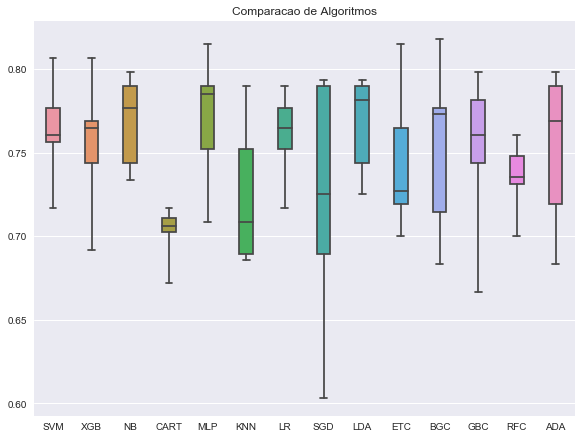

SVM: 0.771696 (0.032507)  -  XGB: 0.755098 (0.037658)  -  NB: 0.768446 (0.025552)  -  CART: 0.713373 (0.014614)  -  
MLP: 0.770099 (0.030758)  -  KNN: 0.738320 (0.046849)  -  LR: 0.765043 (0.026615)  -  SGD: 0.728555 (0.041935)  -  
LDA: 0.766724 (0.027327)  -  ETC: 0.756529 (0.047692)  -  BGC: 0.738375 (0.033258)  -  GBC: 0.751807 (0.040179)  -  

	A melhor pontuação foi de: 0.771696 para o algoritmo SVM 


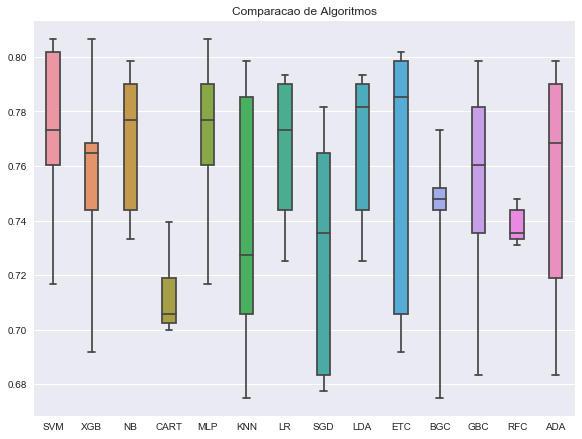

SVM: 0.675378 (0.002361)  -  XGB: 0.667936 (0.021961)  -  NB: 0.742602 (0.021706)  -  CART: 0.651147 (0.037274)  -  
MLP: 0.620048 (0.121256)  -  KNN: 0.558108 (0.099313)  -  LR: 0.748104 (0.036899)  -  SGD: 0.478758 (0.112978)  -  
LDA: 0.768649 (0.012338)  -  ETC: 0.710824 (0.007958)  -  BGC: 0.694244 (0.048250)  -  GBC: 0.673631 (0.029760)  -  

	A melhor pontuação foi de: 0.768649 para o algoritmo LDA 


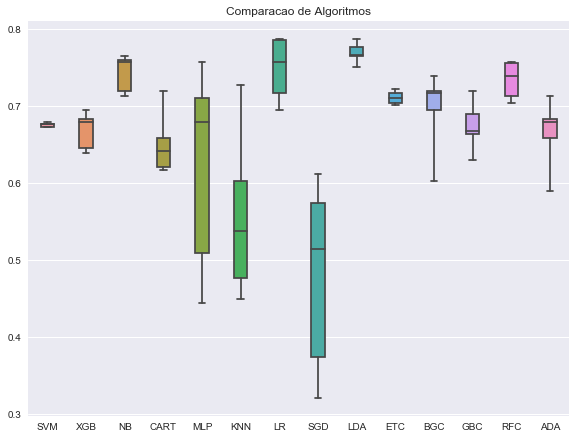

SVM: 0.683578 (0.002175)  -  XGB: 0.724067 (0.021480)  -  NB: 0.762719 (0.033535)  -  CART: 0.710007 (0.045131)  -  
MLP: 0.633579 (0.096873)  -  KNN: 0.620722 (0.056536)  -  LR: 0.756719 (0.031527)  -  SGD: 0.564911 (0.142095)  -  
LDA: 0.758678 (0.021930)  -  ETC: 0.715904 (0.027443)  -  BGC: 0.730270 (0.020144)  -  GBC: 0.705924 (0.025016)  -  

	A melhor pontuação foi de: 0.762719 para o algoritmo NB 


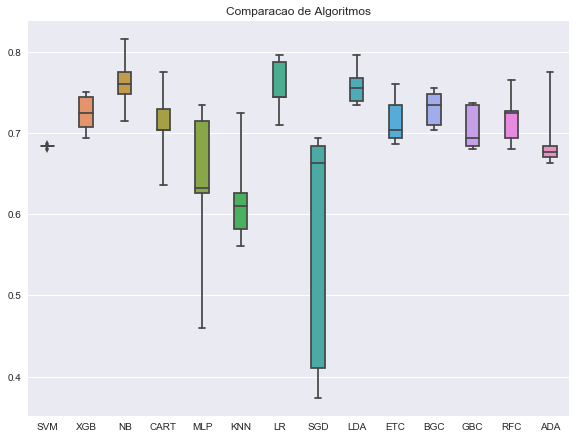

SVM: 0.761067 (0.018898)  -  XGB: 0.667936 (0.021961)  -  NB: 0.742602 (0.021706)  -  CART: 0.601287 (0.107671)  -  
MLP: 0.776055 (0.026349)  -  KNN: 0.703503 (0.041465)  -  LR: 0.762988 (0.026109)  -  SGD: 0.714650 (0.057804)  -  
LDA: 0.768649 (0.012338)  -  ETC: 0.731299 (0.018601)  -  BGC: 0.682856 (0.025444)  -  GBC: 0.666223 (0.036681)  -  

	A melhor pontuação foi de: 0.776055 para o algoritmo MLP 


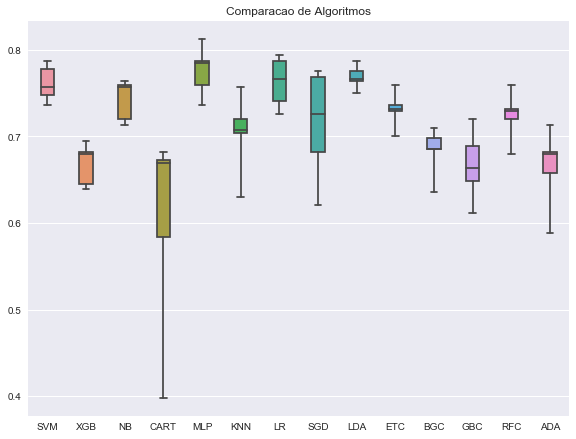

SVM: 0.740750 (0.025910)  -  XGB: 0.667936 (0.021961)  -  NB: 0.742602 (0.021706)  -  CART: 0.649261 (0.028901)  -  
MLP: 0.724031 (0.025104)  -  KNN: 0.723995 (0.043195)  -  LR: 0.770518 (0.013877)  -  SGD: 0.738846 (0.023861)  -  
LDA: 0.768649 (0.012338)  -  ETC: 0.748070 (0.014219)  -  BGC: 0.708920 (0.024145)  -  GBC: 0.669910 (0.033273)  -  

	A melhor pontuação foi de: 0.770518 para o algoritmo LR 


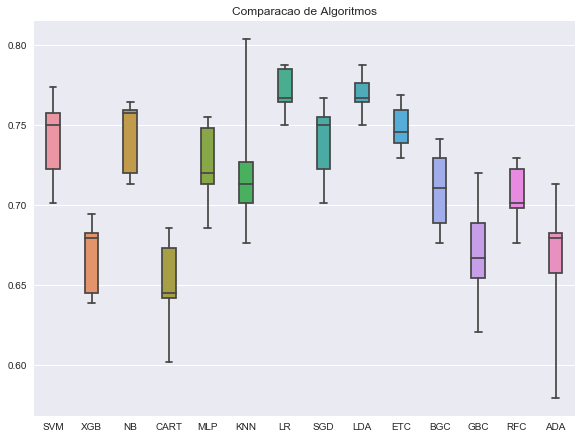

SVM: 0.764658 (0.008760)  -  XGB: 0.724067 (0.021480)  -  NB: 0.762719 (0.033535)  -  CART: 0.707925 (0.034581)  -  
MLP: 0.760759 (0.024834)  -  KNN: 0.707843 (0.021598)  -  LR: 0.774922 (0.027488)  -  SGD: 0.732375 (0.061703)  -  
LDA: 0.758678 (0.021930)  -  ETC: 0.760760 (0.018272)  -  BGC: 0.730230 (0.026072)  -  GBC: 0.707944 (0.023867)  -  

	A melhor pontuação foi de: 0.774922 para o algoritmo LR 


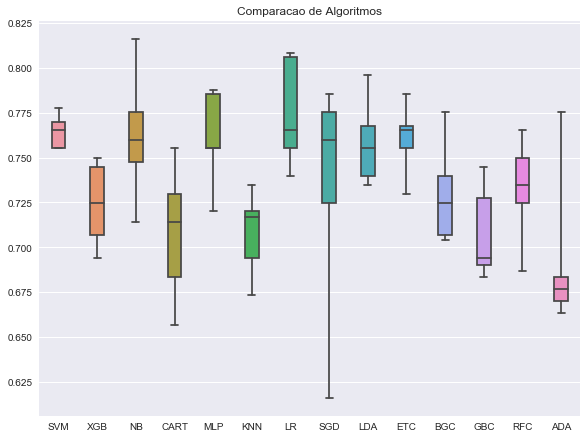

SVM: 0.752454 (0.029866)  -  XGB: 0.728149 (0.023940)  -  NB: 0.762719 (0.033535)  -  CART: 0.712007 (0.029966)  -  
MLP: 0.736638 (0.044777)  -  KNN: 0.734333 (0.033822)  -  LR: 0.764739 (0.015628)  -  SGD: 0.721904 (0.033281)  -  
LDA: 0.758678 (0.021930)  -  ETC: 0.728129 (0.040752)  -  BGC: 0.736394 (0.032621)  -  GBC: 0.705924 (0.025016)  -  

	A melhor pontuação foi de: 0.764739 para o algoritmo LR 


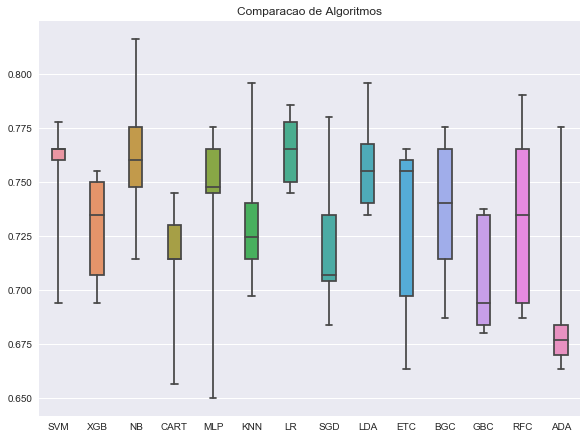

SVM: 0.666067 (0.008018)  -  XGB: 0.763129 (0.023454)  -  NB: 0.781752 (0.021449)  -  CART: 0.695766 (0.026826)  -  
MLP: 0.653087 (0.032880)  -  KNN: 0.733325 (0.043116)  -  LR: 0.768684 (0.017702)  -  SGD: 0.494849 (0.145777)  -  
LDA: 0.785507 (0.015898)  -  ETC: 0.738898 (0.018340)  -  BGC: 0.727700 (0.016693)  -  GBC: 0.766798 (0.029476)  -  

	A melhor pontuação foi de: 0.785507 para o algoritmo LDA 


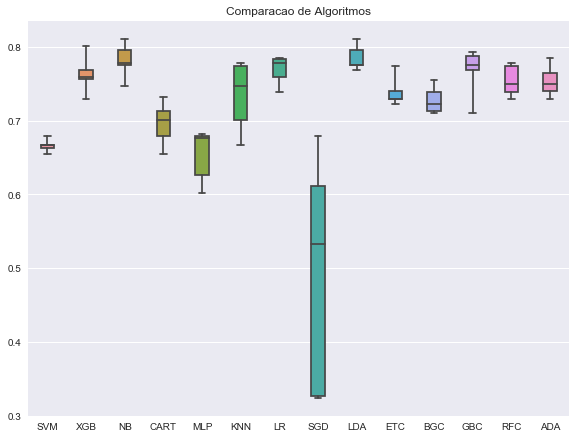

SVM: 0.673435 (0.006799)  -  XGB: 0.746414 (0.045776)  -  NB: 0.776882 (0.028742)  -  CART: 0.687537 (0.016517)  -  
MLP: 0.695803 (0.015661)  -  KNN: 0.754557 (0.053490)  -  LR: 0.776964 (0.026459)  -  SGD: 0.443912 (0.152208)  -  
LDA: 0.785045 (0.021108)  -  ETC: 0.736250 (0.017781)  -  BGC: 0.734209 (0.034762)  -  GBC: 0.754413 (0.038107)  -  

	A melhor pontuação foi de: 0.785045 para o algoritmo LDA 


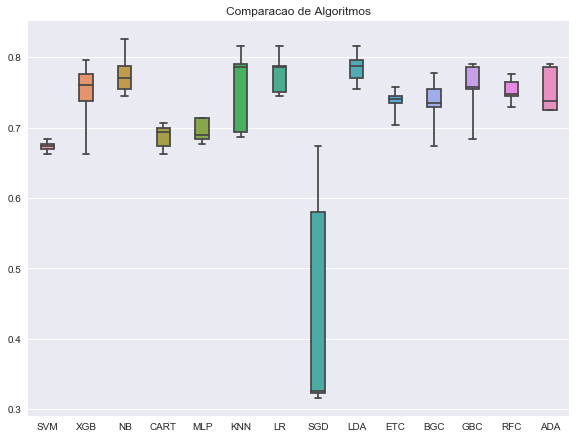

SVM: 0.789025 (0.008028)  -  XGB: 0.746414 (0.045776)  -  NB: 0.776882 (0.028742)  -  CART: 0.679312 (0.033676)  -  
MLP: 0.789065 (0.020520)  -  KNN: 0.748291 (0.032438)  -  LR: 0.785004 (0.011485)  -  SGD: 0.657232 (0.120994)  -  
LDA: 0.785045 (0.021108)  -  ETC: 0.742331 (0.048268)  -  BGC: 0.754331 (0.033943)  -  GBC: 0.760536 (0.032697)  -  

	A melhor pontuação foi de: 0.789065 para o algoritmo MLP 


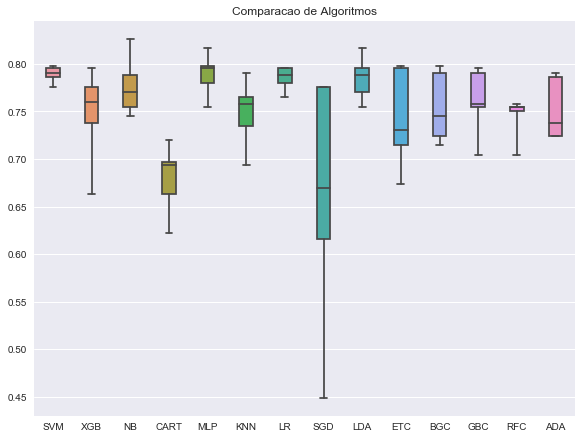

SVM: 0.776820 (0.021741)  -  XGB: 0.748454 (0.048106)  -  NB: 0.776882 (0.028742)  -  CART: 0.681394 (0.027797)  -  
MLP: 0.774943 (0.035916)  -  KNN: 0.756311 (0.049760)  -  LR: 0.789086 (0.016960)  -  SGD: 0.711986 (0.028962)  -  
LDA: 0.785045 (0.021108)  -  ETC: 0.748270 (0.030603)  -  BGC: 0.740229 (0.037058)  -  GBC: 0.756433 (0.038487)  -  

	A melhor pontuação foi de: 0.789086 para o algoritmo LR 


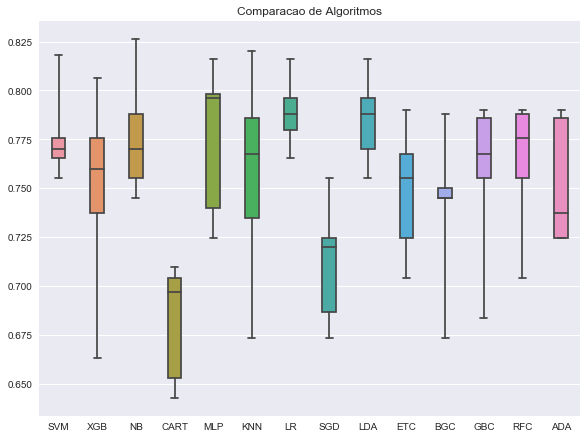

SVM: 0.776126 (0.013033)  -  XGB: 0.763129 (0.023454)  -  NB: 0.781752 (0.021449)  -  CART: 0.692115 (0.028635)  -  
MLP: 0.791168 (0.025288)  -  KNN: 0.746220 (0.052791)  -  LR: 0.770571 (0.014410)  -  SGD: 0.689597 (0.123316)  -  
LDA: 0.785507 (0.015898)  -  ETC: 0.746270 (0.008912)  -  BGC: 0.746149 (0.026960)  -  GBC: 0.766798 (0.029476)  -  

	A melhor pontuação foi de: 0.791168 para o algoritmo MLP 


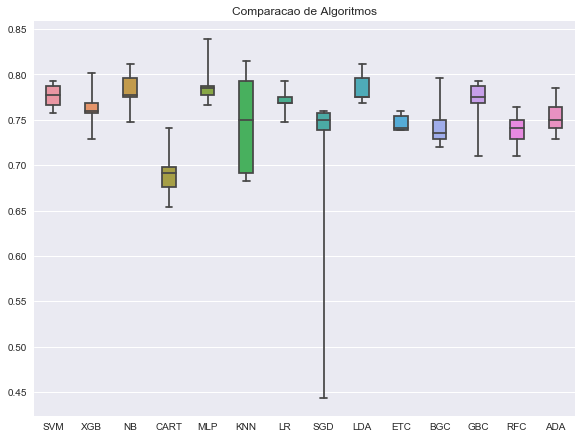

SVM: 0.779865 (0.019893)  -  XGB: 0.763129 (0.023454)  -  NB: 0.781752 (0.021449)  -  CART: 0.697635 (0.026699)  -  
MLP: 0.778100 (0.030123)  -  KNN: 0.751810 (0.038846)  -  LR: 0.787395 (0.024035)  -  SGD: 0.678892 (0.055969)  -  
LDA: 0.785507 (0.015898)  -  ETC: 0.749956 (0.014373)  -  BGC: 0.746149 (0.022827)  -  GBC: 0.766815 (0.035282)  -  

	A melhor pontuação foi de: 0.787395 para o algoritmo LR 


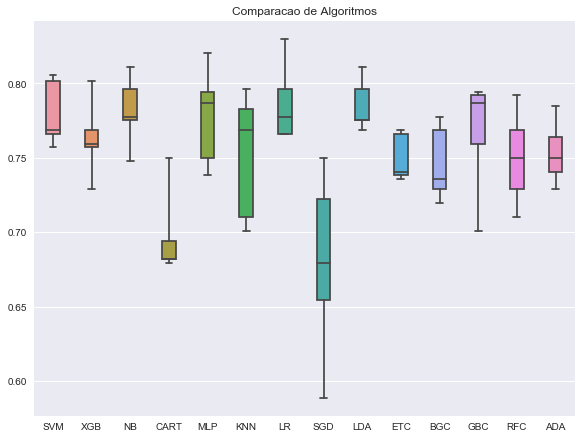

[((0.7911678650966254, 'MLP'), 'MinMaxScaler_FeatureSelection_e_Z-Score'),
 ((0.7890859616573902, 'LR'), 'StandardScaler_FeatureSelection_e_IQR'),
 ((0.7890653473510616, 'MLP'), 'MinMaxScaler_FeatureSelection_e_IQR'),
 ((0.7873946067386377, 'LR'), 'StandardScaler_FeatureSelection_e_Z-Score'),
 ((0.785507487738135, 'LDA'), 'FeatureSelection_e_Z-Score'),
 ((0.7850451453308596, 'LDA'), 'FeatureSelection_e_IQR'),
 ((0.776055238804313, 'MLP'), 'MinMaxScaler_e_Z-Score'),
 ((0.7749222840651413, 'LR'), 'MinMaxScaler_e_IQR'),
 ((0.7733906289788642, 'LR'), 'FeatureSelection'),
 ((0.7716964141028312, 'SVM'), 'StandardScaler_e_FeatureSelection'),
 ((0.7705179699184284, 'LR'), 'StandardScaler_e_Z-Score'),
 ((0.7701130865569368, 'MLP'), 'MinMaxScaler_e_FeatureSelection'),
 ((0.7686488110399237, 'LDA'), 'Z-Score'),
 ((0.7650981549644651, 'LR'), 'StandardScaler'),
 ((0.7647392290249433, 'LR'), 'StandardScaler_e_IQR'),
 ((0.7633899344861911, 'LDA'), 'Padrao'),
 ((0.7633899344861911, 'LDA'), 'MinMaxScal

In [35]:
def scores_x_datasets(datasets):
    scores = []
    for (X, Y, descricao) in datasets:
        scores.append((ranking(X,Y), descricao))
        
    return scores

scores = scores_x_datasets(datasets)
sorted(scores, key = operator.itemgetter(0), reverse=True)

<h5>Calculando os melhores Algoritmos</h5>

In [36]:
def top_algoritmos(scores):
    pontuacao = []
    algoritmo = []
    dataset = []
    scores = sorted(scores, key = operator.itemgetter(0), reverse=True)
    for i in scores:
        _str = str(i)       
        
        _pontuacao = float(_str.split()[0].replace("(", ""). replace(",", ""))
        pontuacao.append(_pontuacao)
        
        _algoritmo = _str.split()[1].replace("'", "").replace(")", "").replace(",", "")
        algoritmo.append(_algoritmo)
        
        _dataset = _str.split()[2].replace("'", "").replace(")", "")
        dataset.append(_dataset)
        
    return Counter(algoritmo)
        
top_algoritmos(scores)

Counter({'LDA': 5, 'LR': 7, 'MLP': 4, 'NB': 1, 'SVM': 1})

<h3>Realizando o Grid-SearchCV, para encontrar os melhores hiperparametros</h3>


In [39]:
def grid_search(datasets, algoritmos):
    
    scores = []
    for algoritmo in algoritmos:        
        for (X, Y, alg_desc) in datasets:

            clf = None
            params = {}

            if(algoritmo == 'SVM'):
                params = {
                    'kernel':('linear', 'rbf'), 
                    'C':(1,0.25,0.5,0.75),
                    'gamma': (1,2,3,'auto'),
                    'decision_function_shape':('ovo','ovr'),
                    'shrinking':(True,False)
                }
                clf = SVC()
            elif(algoritmo == 'XGB'):
                params = {
                    'min_child_weight': [1, 5, 10],
                    'gamma': [0.5, 1, 1.5, 2, 5],
                    'subsample': [0.6, 0.8, 1.0],
                    'colsample_bytree': [0.6, 0.8, 1.0],
                    'max_depth': [3, 4, 5]
                }
                clf = XGBClassifier()
            elif(algoritmo == 'NB'):
                params = { }
                clf = GaussianNB()
            elif(algoritmo == 'CART'):
                params = {
                    'criterion': ['gini', 'entropy'],
                    'min_samples_split': [2, 10, 20],
                    'max_depth': [None, 2, 5, 10],
                    'min_samples_leaf': [1, 5, 10],
                    'max_leaf_nodes': [None, 5, 10, 20],
                }
                clf = DecisionTreeClassifier()
            elif(algoritmo == 'MLP'):
                params = {
                    'solver': ['lbfgs'],
                    'max_iter': [1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000 ], 
                    'alpha': 10.0 ** -np.arange(1, 10), 
                    'hidden_layer_sizes':np.arange(10, 15), 
                    'random_state':[0,1,2,3,4,5,6,7,8,9]
                }
                clf = MLPClassifier()
            elif(algoritmo == 'KNN'):
                params = {
                    'n_neighbors':np.arange(1,50)
                }
                clf = KNeighborsClassifier()
            elif(algoritmo == 'LR'):
                params = {
                    'C':np.logspace(-3,3,7), 
                    'penalty':['l1','l2']
                }
                clf = LogisticRegression()
            elif(algoritmo == 'SGD'):
                params = {
                    'loss' : ['hinge', 'log', 'squared_hinge', 'modified_huber'],
                    'alpha' : [0.0001, 0.001, 0.01, 0.1],
                    'penalty' : ['l2', 'l1', 'none'],
                }
                clf = SGDClassifier()
            elif(algoritmo == 'LDA'):
                params = { }
                clf = LinearDiscriminantAnalysis()
            elif(algoritmo == 'ETC'):
                params = {
                    'n_estimators': np.arange(1, 200)
                }
                clf = ExtraTreesClassifier()
            elif(algoritmo == 'BGC'):
                params = {
                    'base_estimator__max_depth': [3,5,10,20],
                    'base_estimator__max_features': [None, 'auto'],
                    'base_estimator__min_samples_leaf': [1, 3, 5, 7, 10],
                    'base_estimator__min_samples_split': [2, 5, 7],
                    'bootstrap_features': [False, True],
                    'max_features': [0.5, 0.7, 1.0],
                    'max_samples': [0.5, 0.7, 1.0],
                    'n_estimators': [2, 5, 10, 20],
                }
                clf = BaggingClassifier()
            elif(algoritmo == 'GBC'):
                params = {
                    'loss': ['deviance'],
                    'learning_rate': [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
                    'min_samples_split': np.linspace(0.1, 0.5, 12),
                    'min_samples_leaf': np.linspace(0.1, 0.5, 12),
                    'max_depth': [3,5,8],
                    'max_features':['log2','sqrt'],
                    'criterion': ['friedman_mse',  'mae'],
                    'subsample': [0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
                    'n_estimators' :[10]
                }
                clf = GradientBoostingClassifier()
            elif(algoritmo == 'RFC'):
                params = {
                    'n_estimators': [200, 500],
                    'max_features': ['auto', 'sqrt', 'log2'],
                    'max_depth' : [4,5,6,7,8],
                    'criterion' : ['gini', 'entropy']
                }
                clf = RandomForestClassifier()
            elif(algoritmo == 'ADA'):
                params = {
                    'base_estimator__criterion' : ['gini', 'entropy'],
                    'base_estimator__splitter' : ['best', 'random'],
                    'n_estimators': [1, 2]
                }
                clf = AdaBoostClassifier()


            grid = GridSearchCV(clf, params, cv=5, verbose=3, n_jobs=-1)
            grid.fit(X,Y)
            print(grid.best_params_)
            print("O Modelo %s atingiu: %.2f%%  | %s" % (algoritmo, (grid.best_score_ * 100.0), alg_desc))
            
            scores.append((grid.best_score_, algoritmo, grid.best_params_, grid.best_estimator_ ))
    return scores

In [60]:
def gerar_submissao(clf, X, Y, X_test):
    clf = clf
    clf.fit(X, Y)

    X_test = X_test
    predictions = clf.predict(X_test)

    df_resultado = pd.DataFrame({'classe' : predictions})
    df_resultado.index = np.arange(1, len(df_resultado) +1)
    df_resultado.index.rename('id', inplace=True)
    df_resultado
    df_resultado.to_csv('sampleSubmission.csv', sep=',', encoding='utf-8')

In [40]:
list_alg = top_algoritmos(scores).keys()

best_datasets = []
best_datasets.append((X_iqr_fs_norm_mms, Y_iqr, "MinMaxScaler_FeatureSelection_e_IQR"))
best_datasets.append((X_iqr_fs_norm_ss,Y_iqr, "StandardScaler_FeatureSelection_e_IQR"))
best_datasets.append((X_iqr_fs, Y_iqr, "FeatureSelection_e_IQR"))
best_datasets.append((X_zscore_fs, Y_zscore, "FeatureSelection_e_Z-Score"))
best_datasets.append((X_zscore_fs_norm_mms, Y_zscore, "MinMaxScaler_FeatureSelection_e_Z-Score"))
best_datasets.append((X_zscore_fs_norm_ss, Y_zscore, "StandardScaler_FeatureSelection_e_Z-Score"))

scores_grid = grid_search(best_datasets, list_alg)    

Fitting 5 folds for each of 4950 candidates, totalling 24750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   19.2s
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:   26.7s
[Parallel(n_jobs=-1)]: Done 844 tasks      | elapsed:   37.7s
[Parallel(n_jobs=-1)]: Done 1548 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 2380 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 3340 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 4428 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 5644 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 6645 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 8117 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 9717 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 11445 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 13301 tasks      |

{'alpha': 1e-05, 'solver': 'lbfgs', 'max_iter': 1000, 'random_state': 2, 'hidden_layer_sizes': 12}
O Modelo MLP atingiu: 80.12%  | MinMaxScaler_FeatureSelection_e_IQR
Fitting 5 folds for each of 4950 candidates, totalling 24750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 232 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 552 tasks      | elapsed:   31.3s
[Parallel(n_jobs=-1)]: Done 1000 tasks      | elapsed:   59.3s
[Parallel(n_jobs=-1)]: Done 1576 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 2280 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 3112 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 4072 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 5160 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 6376 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 7720 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 9192 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 10792 tasks      | elapsed: 13.0min
[Parallel(n_jobs=-1)]: Done 12520 tasks      | elapsed: 14.9min
[Parallel(n_jobs=-1)]: Done 14376 tasks    

{'alpha': 0.1, 'solver': 'lbfgs', 'max_iter': 1000, 'random_state': 7, 'hidden_layer_sizes': 10}
O Modelo MLP atingiu: 79.11%  | StandardScaler_FeatureSelection_e_IQR
Fitting 5 folds for each of 4950 candidates, totalling 24750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 440 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 1080 tasks      | elapsed:   25.7s
[Parallel(n_jobs=-1)]: Done 1976 tasks      | elapsed:   45.4s
[Parallel(n_jobs=-1)]: Done 3128 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 4536 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 6200 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 8120 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 10296 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 12728 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 15416 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 18360 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 21560 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 24750 out of 24750 | elapsed:  7.9min finished
C:\Users\dfabiano\AppData\L

{'alpha': 0.1, 'solver': 'lbfgs', 'max_iter': 1000, 'random_state': 6, 'hidden_layer_sizes': 10}
O Modelo MLP atingiu: 80.12%  | FeatureSelection_e_IQR
Fitting 5 folds for each of 4950 candidates, totalling 24750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 1082 tasks      | elapsed:   24.8s
[Parallel(n_jobs=-1)]: Done 1978 tasks      | elapsed:   44.3s
[Parallel(n_jobs=-1)]: Done 3130 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 4538 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 6202 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 8122 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 10298 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 12730 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 15418 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 18362 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 21562 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 24750 out of 24750 | elapsed:  8.2min finished
C:\Users\dfabiano\AppData\L

{'alpha': 1e-06, 'solver': 'lbfgs', 'max_iter': 1000, 'random_state': 8, 'hidden_layer_sizes': 13}
O Modelo MLP atingiu: 79.48%  | FeatureSelection_e_Z-Score
Fitting 5 folds for each of 4950 candidates, totalling 24750 fits


[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 456 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done 1096 tasks      | elapsed:   35.4s
[Parallel(n_jobs=-1)]: Done 1992 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 3144 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 4552 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 6216 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 8136 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 10312 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 12744 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 15432 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 18376 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 21576 tasks      | elapsed: 11.5min
[Parallel(n_jobs=-1)]: Done 24750 out of 24750 | elapsed: 13.3min finished
C:\Users\dfabiano\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\model_selection\_search.p

{'alpha': 0.0001, 'solver': 'lbfgs', 'max_iter': 1400, 'random_state': 4, 'hidden_layer_sizes': 11}
O Modelo MLP atingiu: 79.85%  | MinMaxScaler_FeatureSelection_e_Z-Score
Fitting 5 folds for each of 4950 candidates, totalling 24750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:   23.3s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   39.7s
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1560 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 2040 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 3864 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 4600 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 5400 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 6264 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 7192 tasks      | e

{'alpha': 0.001, 'solver': 'lbfgs', 'max_iter': 1000, 'random_state': 4, 'hidden_layer_sizes': 11}
O Modelo MLP atingiu: 78.36%  | StandardScaler_FeatureSelection_e_Z-Score
Fitting 5 folds for each of 128 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


{'kernel': 'linear', 'C': 1, 'shrinking': True, 'decision_function_shape': 'ovo', 'gamma': 1}
O Modelo SVM atingiu: 79.51%  | MinMaxScaler_FeatureSelection_e_IQR
Fitting 5 folds for each of 128 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Done 216 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:    1.9s finished
C:\Users\dfabiano\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


{'kernel': 'linear', 'C': 1, 'shrinking': True, 'decision_function_shape': 'ovo', 'gamma': 1}
O Modelo SVM atingiu: 79.31%  | StandardScaler_FeatureSelection_e_IQR
Fitting 5 folds for each of 128 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 232 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:   16.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


{'kernel': 'linear', 'C': 0.25, 'shrinking': True, 'decision_function_shape': 'ovo', 'gamma': 1}
O Modelo SVM atingiu: 79.11%  | FeatureSelection_e_IQR
Fitting 5 folds for each of 128 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 232 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 552 tasks      | elapsed:   17.9s
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:   21.6s finished


{'kernel': 'linear', 'C': 1, 'shrinking': True, 'decision_function_shape': 'ovo', 'gamma': 1}
O Modelo SVM atingiu: 79.10%  | FeatureSelection_e_Z-Score
Fitting 5 folds for each of 128 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:    1.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


{'kernel': 'linear', 'C': 1, 'shrinking': True, 'decision_function_shape': 'ovo', 'gamma': 1}
O Modelo SVM atingiu: 78.73%  | MinMaxScaler_FeatureSelection_e_Z-Score
Fitting 5 folds for each of 128 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


{'kernel': 'linear', 'C': 0.5, 'shrinking': True, 'decision_function_shape': 'ovo', 'gamma': 1}
O Modelo SVM atingiu: 78.92%  | StandardScaler_FeatureSelection_e_Z-Score
Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


{'penalty': 'l1', 'C': 1.0}
O Modelo LR atingiu: 79.31%  | MinMaxScaler_FeatureSelection_e_IQR
Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


{'penalty': 'l2', 'C': 0.1}
O Modelo LR atingiu: 78.90%  | StandardScaler_FeatureSelection_e_IQR
Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    0.2s finished
C:\Users\dfabiano\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


{'penalty': 'l1', 'C': 10.0}
O Modelo LR atingiu: 78.90%  | FeatureSelection_e_IQR
Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


{'penalty': 'l1', 'C': 10.0}
O Modelo LR atingiu: 78.92%  | FeatureSelection_e_Z-Score
Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


{'penalty': 'l1', 'C': 10.0}
O Modelo LR atingiu: 78.92%  | MinMaxScaler_FeatureSelection_e_Z-Score
Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s


{'penalty': 'l1', 'C': 1.0}
O Modelo LR atingiu: 78.92%  | StandardScaler_FeatureSelection_e_Z-Score
Fitting 5 folds for each of 1 candidates, totalling 5 fits
{}
O Modelo LDA atingiu: 78.50%  | MinMaxScaler_FeatureSelection_e_IQR
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


{}
O Modelo LDA atingiu: 78.50%  | StandardScaler_FeatureSelection_e_IQR
Fitting 5 folds for each of 1 candidates, totalling 5 fits
{}
O Modelo LDA atingiu: 78.50%  | FeatureSelection_e_IQR
Fitting 5 folds for each of 1 candidates, totalling 5 fits
{}
O Modelo LDA atingiu: 78.54%  | FeatureSelection_e_Z-Score
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


{}
O Modelo LDA atingiu: 78.54%  | MinMaxScaler_FeatureSelection_e_Z-Score
Fitting 5 folds for each of 1 candidates, totalling 5 fits
{}
O Modelo LDA atingiu: 78.54%  | StandardScaler_FeatureSelection_e_Z-Score
Fitting 5 folds for each of 1 candidates, totalling 5 fits
{}
O Modelo NB atingiu: 77.69%  | MinMaxScaler_FeatureSelection_e_IQR
Fitting 5 folds for each of 1 candidates, totalling 5 fits
{}
O Modelo NB atingiu: 77.69%  | StandardScaler_FeatureSelection_e_IQR
Fitting 5 folds for each of 1 candidates, totalling 5 fits
{}
O Modelo NB atingiu: 77.69%  | FeatureSelection_e_IQR


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 1 candidates, totalling 5 fits
{}
O Modelo NB atingiu: 78.17%  | FeatureSelection_e_Z-Score
Fitting 5 folds for each of 1 candidates, totalling 5 fits
{}
O Modelo NB atingiu: 78.17%  | MinMaxScaler_FeatureSelection_e_Z-Score
Fitting 5 folds for each of 1 candidates, totalling 5 fits
{}
O Modelo NB atingiu: 78.17%  | StandardScaler_FeatureSelection_e_Z-Score


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [55]:
#{'alpha': 0.1, 'solver': 'lbfgs', 'max_iter': 1000, 'random_state': 6, 'hidden_layer_sizes': 10}
#O Modelo MLP atingiu: 80.12%  | FeatureSelection_e_IQR

clf = MLPClassifier(alpha=0.1, solver='lbfgs', max_iter=1000, random_state=6, hidden_layer_sizes= 10)
cross = cross_val_score(clf, X_iqr_fs, Y_iqr, cv=10)
print("O Modelo de MLPClassifier atingiu: %.2f%% " % (cross.mean() * 100.0))

O Modelo de MLPClassifier atingiu: 78.71% 


In [78]:
#{'penalty': 'l1', 'C': 1.0}
#O Modelo LR atingiu: 79.31%  | MinMaxScaler_FeatureSelection_e_IQ

clf = LogisticRegression(penalty='l1', C=1.0)
cross = cross_val_score(clf, X_iqr_fs_norm_mms, Y_iqr, cv=10)
print("O Modelo de LogisticRegression atingiu: %.2f%% " % (cross.mean() * 100.0))

O Modelo de LogisticRegression atingiu: 79.13% 


In [59]:
#{'kernel': 'linear', 'C': 1, 'shrinking': True, 'decision_function_shape': 'ovo', 'gamma': 1}
#O Modelo SVM atingiu: 79.51%  | MinMaxScaler_FeatureSelection_e_IQR

#clf = SVC(kernel='linear', C=1, shrinking=True, decision_function_shape='ovo', gamma=1)
#cross = cross_val_score(clf, X_iqr_fs, Y_iqr, cv=10)
#print("O Modelo de SVC atingiu: %.2f%% " % (cross.mean() * 100.0))

O Modelo de SVC atingiu: 79.54% 


In [79]:
# preparando o dataset de treino para submissao

X_test = df_teste

best_columns = ['glicose', 'bmi', 'indice_historico', 'idade']
X_test_fs = X_test[best_columns]
X_test_fs_mms = normalizar_MinMaxScaler(X_test_fs)

#(clf, X, Y, X_test):
gerar_submissao(clf, X_iqr_fs, Y_iqr, X_test_fs_mms)